# Part II - Ford GoBike System Data Analysis
## by Le Hanh Quyen

>**Before you start**: You must have the README.md file ready that include a summary of main findings that reflects on the steps taken during the data exploration (Part I notebook). The README.md file should also describes the key insights that will be conveyed by the explanatory slide deck (Part II  outcome)



## Investigation Overview


> Describe the overall goals of your presentation here. Add a summary of key insights at the start of the notebook, just as you added in the README.md. This will help your notebook to stay aligned to the key insights you want to include in your slide deck.

> **Rubric Tip**: The key insights in the slideshow must match those documented in the README.md summary. 


## Dataset Overview

> Provide a brief overview of the dataset to be presented here.

In [7]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [8]:
# load in the dataset into a pandas dataframe
ford_gobike = pd.read_csv('201902-fordgobike-tripdata.csv')
ford_gobike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [9]:
#data processing

ford_gobike['start_time'] = pd.to_datetime(ford_gobike['start_time'])
ford_gobike['end_time'] = pd.to_datetime(ford_gobike['end_time'])

ford_gobike['start_date'] = ford_gobike['start_time'].dt.date
ford_gobike['start_hourofday'] = ford_gobike['start_time'].dt.hour

ford_gobike['start_dayofweek'] = ford_gobike['start_time'].dt.dayofweek
ford_gobike['start_dayofweek'] = ford_gobike['start_dayofweek'].astype('str')
ford_gobike['start_dayofweek'] = ford_gobike['start_dayofweek'].replace(['0', '1', '2', '3', '4', '5', '6'],['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

In [10]:
#order the day in a week

cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

ford_gobike['start_dayofweek'] = ford_gobike['start_dayofweek'].astype('category', categories=cats, ordered=True) 

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Number of Bikers per Gender in a day

In all gender, most bikers rarely ride in 0-5am, and they're often ride in 8am and 5pm

Text(0.5,1,'Number of Bikers per Gender in a day')

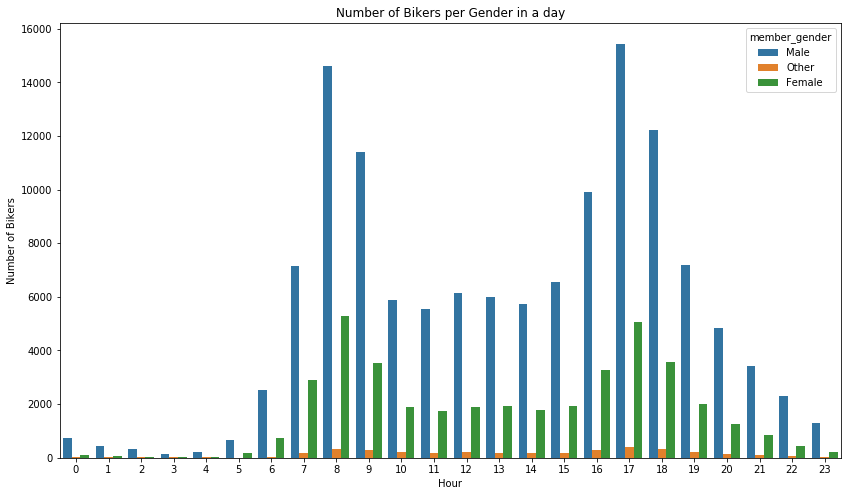

In [11]:
plt.figure(figsize=(14,8))
sns.countplot(data=ford_gobike, x='start_hourofday', hue='member_gender')
plt.xlabel('Hour')
plt.ylabel('Number of Bikers')
plt.title('Number of Bikers per Gender in a day')

## Number of Bikers per Gender in a week

Female and Male bikers often ride in weekdays, but the other gender ride bikes is the same in everyday


Text(0.5,1,'Number of Bikers per Gender in a week')

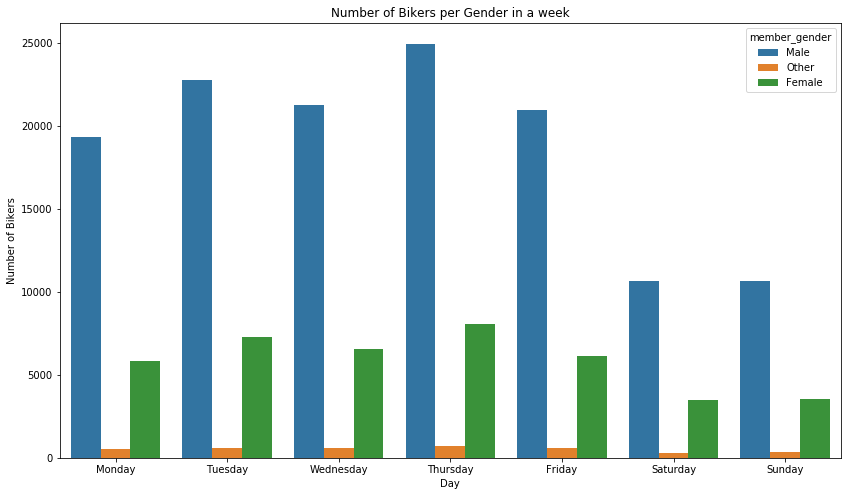

In [12]:
plt.figure(figsize=(14,8))
sns.countplot(data=ford_gobike, x='start_dayofweek', hue='member_gender')
plt.xlabel('Day')
plt.ylabel('Number of Bikers')
plt.title('Number of Bikers per Gender in a week')

## Hourly in each Day for Gender

In weekdays, Male and Female are similar because there're a lot of male bikers and female bikers ride at 8am from Tuesday - Friday and at 5pm from Tuesday - Thursday. Other gender ride bike the most in 5pm of Thursday. But in other, in weekends, all of gender don't ride bike much. And in everyday, from 0-5am, there are not many bikers in all of gender

Text(96,0.5,'Day of Week')

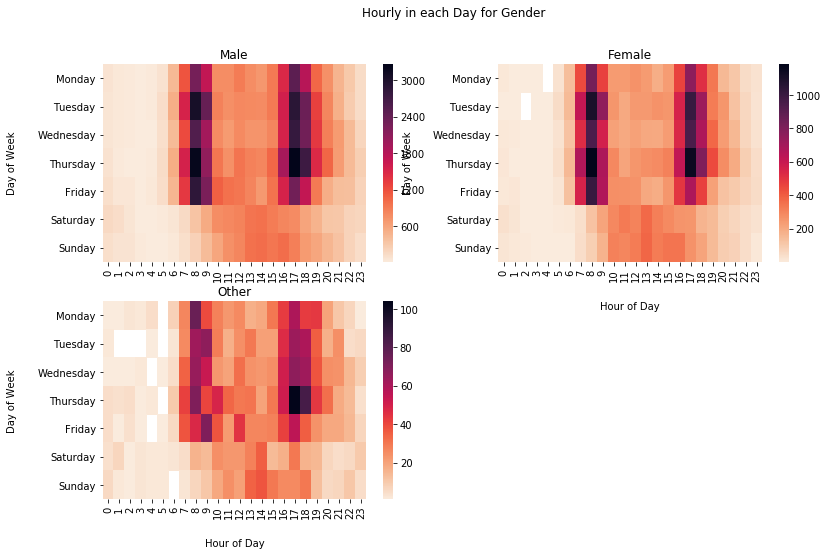

In [19]:
plt.figure(figsize=[13, 8])
plt.suptitle('Hourly in each Day for Gender')

plt.subplot(221)
male = ford_gobike.query('member_gender == "Male"')
male_ = (male.groupby(['start_dayofweek', 'start_hourofday']).size()).reset_index(name='count')
sns.heatmap(male_.pivot(index='start_dayofweek', columns='start_hourofday', values='count'), cmap='rocket_r')
plt.title('Male', loc='center')
plt.xlabel('Hour of Day', labelpad=20)
plt.ylabel('Day of Week', labelpad=20)

plt.subplot(222)
female = ford_gobike.query('member_gender == "Female"')
female_ = (female.groupby(['start_dayofweek', 'start_hourofday']).size()).reset_index(name='count')
sns.heatmap(female_.pivot(index='start_dayofweek', columns='start_hourofday', values='count'), cmap='rocket_r')
plt.title('Female', loc='center')
plt.xlabel('Hour of Day', labelpad=20)
plt.ylabel('Day of Week', labelpad=20)

plt.subplot(223)
other = ford_gobike.query('member_gender == "Other"')
other_ = (other.groupby(['start_dayofweek', 'start_hourofday']).size()).reset_index(name='count')
sns.heatmap(other_.pivot(index='start_dayofweek', columns='start_hourofday', values='count'), cmap='rocket_r')
plt.title('Other', loc='center')
plt.xlabel('Hour of Day', labelpad=20)
plt.ylabel('Day of Week', labelpad=20)

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 368479 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck_template.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/

> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
